# <b>Просмотр и Обработка Датасета</b>

In [193]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [194]:
df = pd.read_csv('./train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<h3>Описание названия колонок:</h3>
<ul>
<li>survival - Выживание (0 = Нет; 1 = Да)</li>
<li>pclass - Класс пассажира (1 = 1-й; 2 = 2-й; 3 = 3-й)</li>
<li>name - Имя</li>
<li>sex - Пол</li>
<li>age - Возраст</li>
<li>sibsp - Количество братьев/сестер или супругов на борту</li>
<li>parch - Количество родителей/детей на борту</li>
<li>ticket - Номер билета</li>
<li>fare - Стоимость билета пассажира</li>
<li>cabin - Каюта</li>
<li>embarked - Порт посадки (C = Шербур; Q = Квинстаун; S = Саутгемптон)</li>
</ul>

In [195]:
# Проверяем наличие пустых значений в DataFrame
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

В колонке Embarked всего 2 пропущенных поля. Те строки, где они встречаются можно убрать

In [196]:
# Убираем те строки, где нет значения у стобца Embarked 
df = df.dropna(axis=0, subset=['Embarked'])


У нас очень много пропусков в колонке Cabin. Всего мы имеем 891 строку из которых 687  не имеют значение Cabin, и того всего 204 строк, где есть значения Cabin. Было решено просто убрать этот столбец.


In [197]:
# Убираем колонку Cabin
df = df.drop(columns=['Cabin'])

Также 177 пропусков у колоник Age. Пустые колонки Age заполнил средним значением всего столбца Age (Средний возраст - 28 лет). 

In [198]:
# просмотр среднего возраста:
print(f"Средний возраст: {df['Age'].median()}")

Средний возраст: 28.0


In [199]:
# заполняем в столбце age пустые ячейки средним возростом(28 лет)
df['Age'] = df['Age'].fillna(df['Age'].median())

In [200]:
# проверяем, что теперь наш датафрейм не имеет пустых значений
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [201]:
# Получаем общую информацию о DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


# <b>Анализ Датасета</b>

## Подготовка

In [202]:
# Создаем копию DataFrame для анализа, оставляя оригинальный DataFrame для добавления новых признаков(feature engineering)
df_for_analysis = df.copy()

In [203]:
from sklearn.preprocessing import LabelEncoder

# Выбираем категориальные столбцы в DataFrame(те, которые не имеют тип float или int)
cathegorical_columns = df.select_dtypes(include=['object']).columns


for col in cathegorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108,1,22.0,1,0,522,7.2500,2
1,2,1,1,190,0,38.0,1,0,595,71.2833,0
2,3,1,3,353,0,26.0,0,0,668,7.9250,2
3,4,1,1,272,0,35.0,1,0,48,53.1000,2
4,5,0,3,15,1,35.0,0,0,471,8.0500,2


Теперь наш исходный датафрейм имеет числовые типы 

## Возраст и выживаемость

Создал разные возрастные группы: 0-10, 10-20, 20-30, 30-40, 40-50, 50+ лет для упрощения анализа влияние возраста на выживаемость

C:\Users\ditriy\AppData\Local\Temp\ipykernel_2164\2558989258.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age = df_for_analysis.groupby(['AgeGroup', 'Survived']).size().unstack()


<Figure size 3200x1800 with 0 Axes>

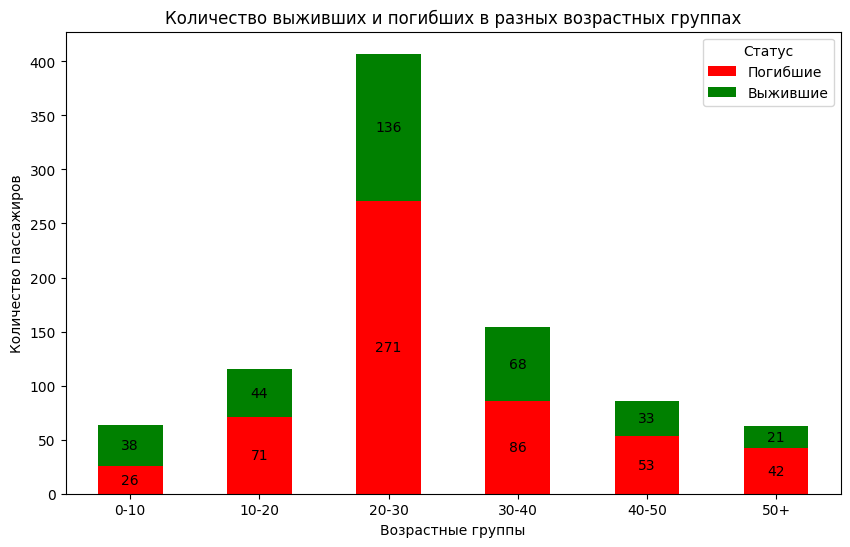

In [204]:
plt.figure(figsize=(16,9),dpi=200)

# Создаем возрастные группы
bins = [0, 10, 20, 30, 40, 50, 100]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50+']

df_for_analysis['AgeGroup'] = pd.cut(df_for_analysis['Age'], bins, labels=labels)

# Группируем данные по возрастным группам и статусу выживания
survival_by_age = df_for_analysis.groupby(['AgeGroup', 'Survived']).size().unstack()

# Рисуем график
ax = survival_by_age.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(10, 6))

plt.xlabel('Возрастные группы')
plt.ylabel('Количество пассажиров')
plt.title('Количество выживших и погибших в разных возрастных группах')
plt.legend(['Погибшие', 'Выжившие'], title='Статус')
plt.xticks(rotation=0)


# Добавляем аннотации на столбцы
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width/2,
            y + height/2,
            '{:.0f}'.format(height),
            horizontalalignment='center',
            verticalalignment='center');

<h3>Выводы:</h3>

<ul>
<li>В возрастной группе 0-10 лет выживших больше, чем погибших (39 выживших против 26 погибших или же 59.7%). Это может быть связано с приоритетом спасения детей.</li>
<li>В возрастной группе 10-20 лет количество погибших значительно превышает количество выживших (71 погибших против 44 выживших или же 38.3%).</li>
<li>В возрастной группе 20-30 лет наблюдается наибольшее количество пассажиров, при этом количество погибших значительно превышает количество выживших (271 погибших против 136 выживших или же 33.6%).</li>
<li>В возрастной группе 30-40 лет количество погибших также превышает количество выживших (86 погибших против 66 выживших или же 43.4%).</li>
<li>В возрастной группе 40-50 лет количество погибших превышает количество выживших (53 погибших против 33 выживших или же 38.4%).</li>
<li>В возрастной группе 50+ количество погибших превышает количество выживших (42 погибших против 21 выживших или же 33.3%).</li>
</ul>

График показывает, что шансы на выживание могут зависеть от возраста пассажира. Младшие возрастные группы (0-10) имеют более высокие шансы на выживание, что может быть связано с приоритетом спасения детей.

In [205]:
# Добавление нового признака в исходный датафрейм
df['Age_priority'] = df_for_analysis['AgeGroup'].apply(lambda x: 1 if x == '0-10' else 0)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_priority
0,1,0,3,108,1,22.0,1,0,522,7.2500,2,0
1,2,1,1,190,0,38.0,1,0,595,71.2833,0,0
2,3,1,3,353,0,26.0,0,0,668,7.9250,2,0
3,4,1,1,272,0,35.0,1,0,48,53.1000,2,0
4,5,0,3,15,1,35.0,0,0,471,8.0500,2,0
5,6,0,3,553,1,28.0,0,0,274,8.4583,1,0
6,7,0,1,514,1,54.0,0,0,84,51.8625,2,0
7,8,0,3,623,1,2.0,3,1,394,21.0750,2,1
8,9,1,3,411,0,27.0,0,2,343,11.1333,2,0
9,10,1,2,575,0,14.0,1,0,131,30.0708,0,0


## Пол и выживаемость

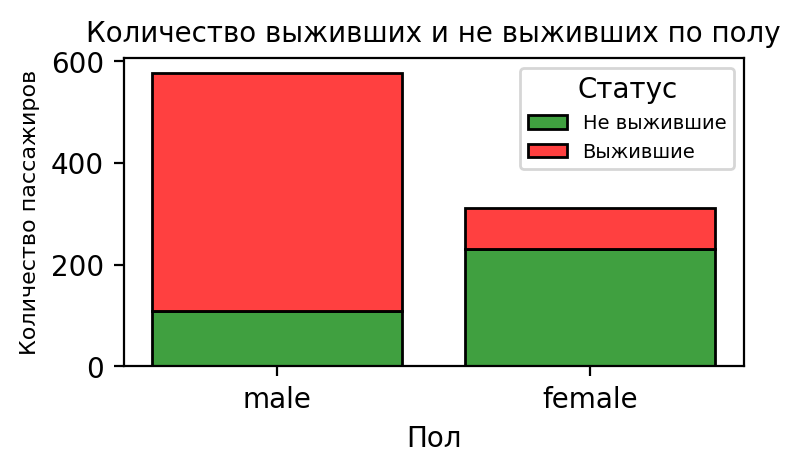

In [206]:
plt.figure(figsize=(4,2),dpi=200)

# График для выживших и не выживших
sns.histplot(data=df_for_analysis, x='Sex', hue='Survived', multiple='stack', palette=['red', 'green'], shrink=0.8)

# Добавляем заголовки и метки
plt.xlabel('Пол')
plt.xticks([0,1])
plt.ylabel('Количество пассажиров', fontsize=8)
plt.title('Количество выживших и не выживших по полу', fontsize=10)
plt.legend(title='Статус', labels=['Не выжившие', 'Выжившие'], fontsize=7)

# Показываем график
plt.show()

<h3>Выводы:</h3> 
<ul> 
<li>
График показывает, что количество выживших женщин (около 230) значительно превышает количество не выживших женщин (около 80). Это указывает на высокий процент выживших среди женщин.</li> <li>Для мужчин, наоборот, количество не выживших (около 460) значительно превышает количество выживших (около 100). Это указывает на низкий процент выживших среди мужчин.
</li> 
<li>
Это может быть связано с приоритетом спасения женщин и детей, который традиционно применялся при эвакуации с корабля.</li> 

</ul>
.

## Наличие детей и выживаемость

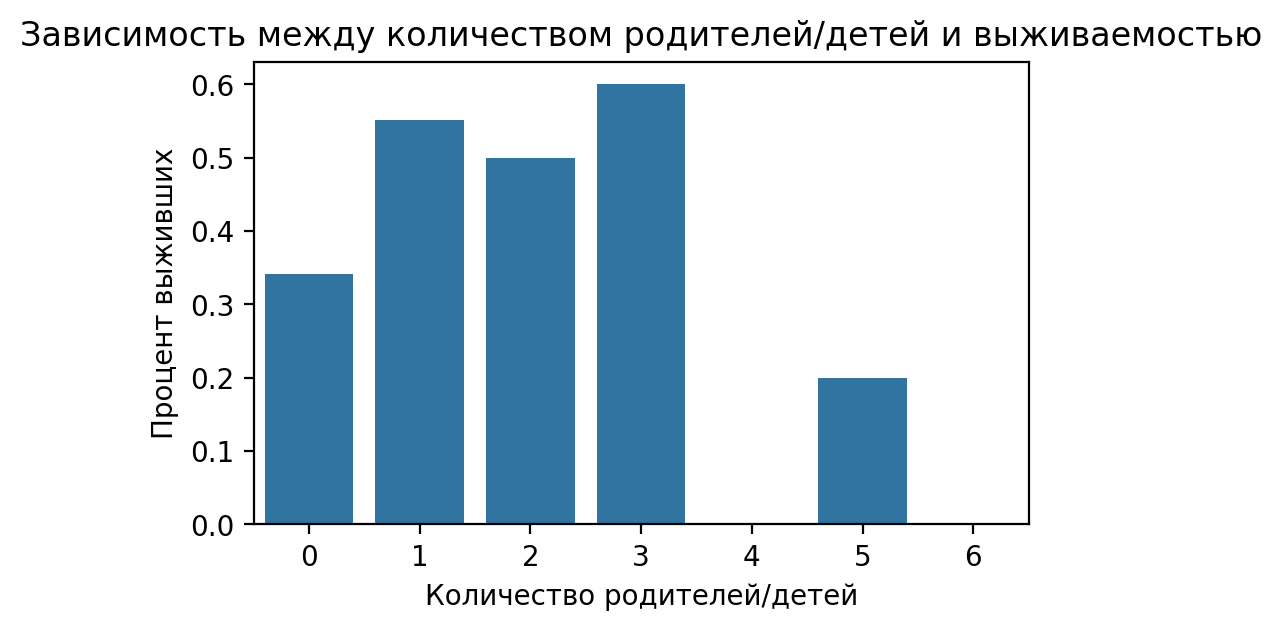

In [207]:
plt.figure(figsize=(5, 3), dpi=200)

# График зависимости между Parch и выживаемостью
sns.barplot(data=df_for_analysis, x='Parch', y='Survived', errorbar=None)

plt.xlabel('Количество родителей/детей');
plt.ylabel('Процент выживших');
plt.title('Зависимость между количеством родителей/детей и выживаемостью');


<h3>Выводы:</h3> 
<ul> 

<li>
График показывает, что процент выживших пассажиров изменяется в зависимости от количества родителей/детей (Parch).
</li> 

<li>
Пассажиры с 1-3 родителями/детьми имели более высокие шансы на выживание (около 50-60%).
</li> 

<li>
Пассажиры без родителей/детей или с большим количеством родителей/детей (5 и более) имели меньшие шансы на выживание (около 20-30%).
</li> 

</ul>

In [208]:
# Создаем новый признак 'Have_1_2_3_Parch'
df['Has_1_to_3_Parch'] = df['Parch'].apply(lambda x: 1 if x in [1, 2, 3] else 0)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_priority,Has_1_to_3_Parch
0,1,0,3,108,1,22.0,1,0,522,7.2500,2,0,0
1,2,1,1,190,0,38.0,1,0,595,71.2833,0,0,0
2,3,1,3,353,0,26.0,0,0,668,7.9250,2,0,0
3,4,1,1,272,0,35.0,1,0,48,53.1000,2,0,0
4,5,0,3,15,1,35.0,0,0,471,8.0500,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,547,1,27.0,0,0,100,13.0000,2,0,0
887,888,1,1,303,0,19.0,0,0,14,30.0000,2,0,0
888,889,0,3,412,0,28.0,1,2,674,23.4500,2,0,1
889,890,1,1,81,1,26.0,0,0,8,30.0000,0,0,0


## Pclass и выживаемость

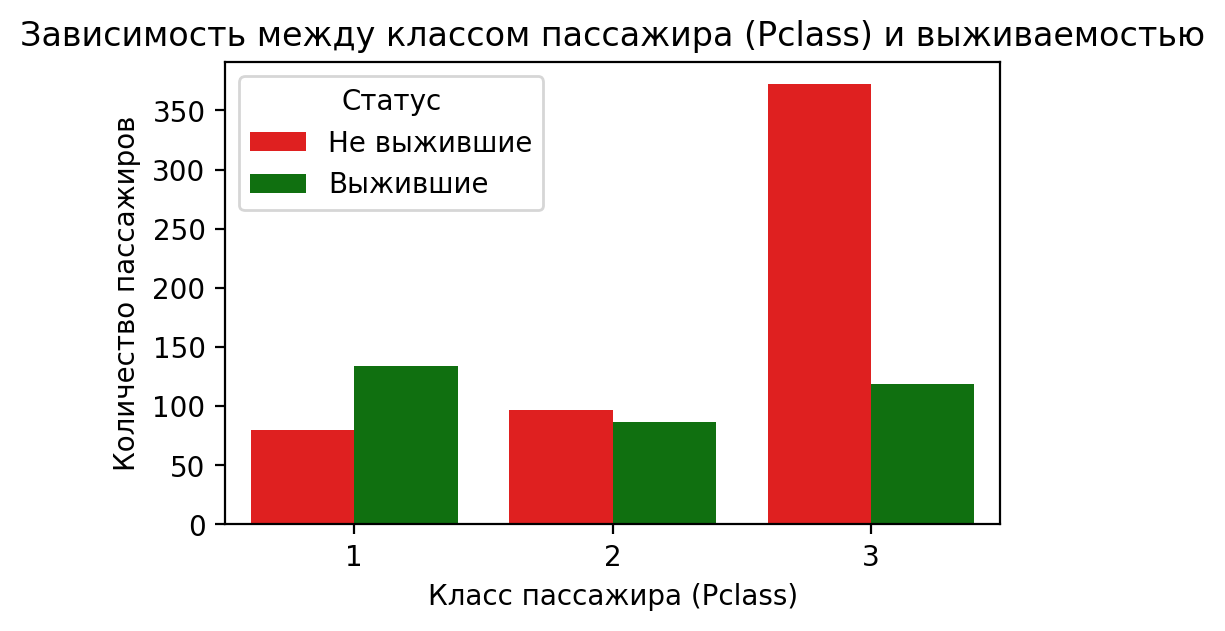

In [209]:
# Создаем фигуру и ось
plt.figure(figsize=(5, 3), dpi=200)

# График зависимости между Pclass и выживаемостью
sns.countplot(data=df_for_analysis, x='Pclass', hue='Survived', palette=['red', 'green'])

plt.xlabel('Класс пассажира (Pclass)')
plt.ylabel('Количество пассажиров')
plt.title('Зависимость между классом пассажира (Pclass) и выживаемостью')
plt.legend(title='Статус', labels=['Не выжившие', 'Выжившие'])

<h3>Выводы:</h3> 
<ul> 
<li>График показывает, что количество выживших пассажиров значительно выше в первом классе (Pclass=1) по сравнению с вторым и третьим классами.</li> 
<li>Количество не выживших пассажиров значительно выше в третьем классе (Pclass=3) по сравнению с первым и вторым классами.</li> 

<li>Пассажиры второго класса имели средние шансы на выживание.</li> 
<li>Это может быть связано с расположением первого, второго и третьего класса.</li> 
<li>Анализ зависимости между классом пассажира (Pclass) и выживаемостью является важным аспектом для понимания динамики выживания на Титанике и может быть полезен для дальнейших исследований и моделирования.</li> 
</ul>

In [210]:
# Создаем новый признак 'Is_First_Class'
df['Is_First_Class'] = df['Pclass'].apply(lambda x: 1 if x == 1 else 0)

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_priority,Has_1_to_3_Parch,Is_First_Class
0,1,0,3,108,1,22.0,1,0,522,7.2500,2,0,0,0
1,2,1,1,190,0,38.0,1,0,595,71.2833,0,0,0,1
2,3,1,3,353,0,26.0,0,0,668,7.9250,2,0,0,0
3,4,1,1,272,0,35.0,1,0,48,53.1000,2,0,0,1
4,5,0,3,15,1,35.0,0,0,471,8.0500,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,547,1,27.0,0,0,100,13.0000,2,0,0,0
887,888,1,1,303,0,19.0,0,0,14,30.0000,2,0,0,1
888,889,0,3,412,0,28.0,1,2,674,23.4500,2,0,1,0
889,890,1,1,81,1,26.0,0,0,8,30.0000,0,0,0,1


# <b>Обучение Модели и Вывод</b>

## Подготовка к обучению

In [221]:
# Убираю PassengerId, так как это номер пасажира(индекс в датасете),
# Name и Ticket, так как он не представляет ценности
data = df.drop(columns=['PassengerId', 'Name', 'Ticket'])

In [222]:
# итоговый датасет для обучения моделей
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_priority,Has_1_to_3_Parch,Is_First_Class
0,0,3,1,22.0,1,0,7.2500,2,0,0,0
1,1,1,0,38.0,1,0,71.2833,0,0,0,1
2,1,3,0,26.0,0,0,7.9250,2,0,0,0
3,1,1,0,35.0,1,0,53.1000,2,0,0,1
4,0,3,1,35.0,0,0,8.0500,2,0,0,0


In [227]:
from sklearn.model_selection import train_test_split 

# Разделяем данные на обучающую и тестовую выборки
X = data.drop(columns=['Survived'])
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [232]:
from sklearn.preprocessing import StandardScaler

# проводим стандартизацию признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Обучение модели

In [235]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from keras.api.models import Sequential
from keras.api.layers import Dense, Dropout


model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


history = model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=8, batch_size=32, validation_split=0.2)


loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.2f}')

Epoch 1/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5698 - loss: 0.6913 - val_accuracy: 0.6364 - val_loss: 0.6709
Epoch 2/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7465 - loss: 0.6427 - val_accuracy: 0.7413 - val_loss: 0.6361
Epoch 3/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7810 - loss: 0.6028 - val_accuracy: 0.7762 - val_loss: 0.6022
Epoch 4/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8137 - loss: 0.5592 - val_accuracy: 0.7762 - val_loss: 0.5662
Epoch 5/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8174 - loss: 0.5166 - val_accuracy: 0.7972 - val_loss: 0.5326
Epoch 6/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8245 - loss: 0.4862 - val_accuracy: 0.7972 - val_loss: 0.5104
Epoch 7/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8292 - loss: 0.4616 - val_accuracy: 0.7972 - val_loss: 0.4907
Epoch 8/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8322 - loss: 0.4228 - val_accuracy: 0.7972 - val_loss: 0.4780

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8377 - loss: 0.5558 - val_accuracy: 0.7972 - val_loss: 0.5889
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8462 - loss: 0.5407 - val_accuracy: 0.7972 - val_loss: 0.5892
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8403 - loss: 0.5271 - val_accuracy: 0.8042 - val_loss: 0.5866
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8430 - loss: 0.5154 - val_accuracy: 0.8182 - val_loss: 0.5873
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8599 - loss: 0.5004 - val_accuracy: 0.8112 - val_loss: 0.5895
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8603 - loss: 0.4951 - val_accuracy: 0.8182 - val_loss: 0.5863
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8640 - loss: 0.4978 - val_accuracy: 0.8182 - val_loss: 0.5851
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8629 - loss: 0.5006 - val_accuracy: 0.8252 - val_loss:

<function matplotlib.pyplot.show(close=None, block=None)>

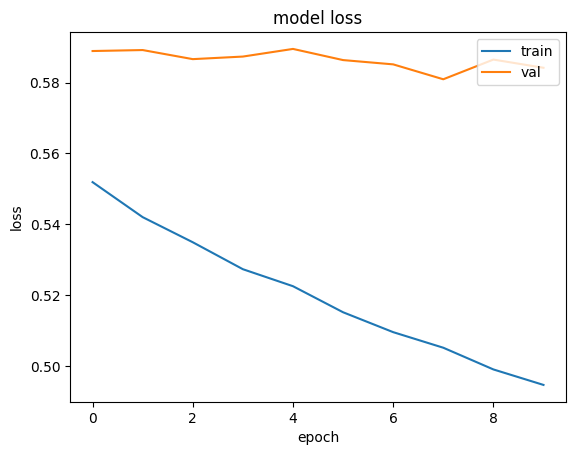

In [231]:
# Строим график потерь модели на обучающей выборке
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show

<h3>Выводы:</h3> 
<ul> 
<li>График потерь модели показывает, что потери на обучающей выборке устойчиво снижаются с увеличением количества эпох, что указывает на успешное обучение модели.</li> 
<li>Потери на валидационной выборке остаются на более высоком уровне и показывают небольшие колебания, что может указывать на недообучение модели или проблемы с обобщением на новые данные.</li> 
<li>Разница между потерями на обучающей и валидационной выборках указывает на то, что модель может недостаточно хорошо обобщать данные. Это может быть связано с недостаточным количеством данных для обучения или с недостаточной сложностью модели.</li> 
<li>Для улучшения производительности модели можно попробовать увеличить сложность модели или использовать техники регуляризации для улучшения обобщающей способности модели.</li> 
</ul>

<h2>Попытки улучшить модель:</h2>

Было добавлены новые слои модели

In [241]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Компилируем модель
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучаем модель
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Оцениваем модель на тестовой выборке
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.2f}')


Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6329 - loss: 0.6736 - val_accuracy: 0.8042 - val_loss: 0.5894
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7882 - loss: 0.5338 - val_accuracy: 0.8042 - val_loss: 0.4865
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8352 - loss: 0.4023 - val_accuracy: 0.8182 - val_loss: 0.4600
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8387 - loss: 0.3989 - val_accuracy: 0.7762 - val_loss: 0.4829
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8389 - loss: 0.3802 - val_accuracy: 0.8112 - val_loss: 0.4692
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8491 - loss: 0.3400 - val_accuracy: 0.8112 - val_loss: 0.4714
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8604 - loss: 0.3333 - val_accuracy: 0.8112 - val_loss: 0.4733
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8274 - loss: 0.3507 - val_accuracy: 0.8112 - val_loss

accuracy остался прежним

<function matplotlib.pyplot.show(close=None, block=None)>

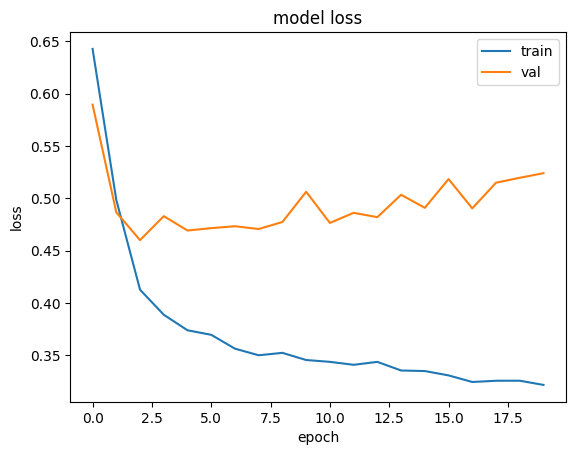

In [242]:
# Строим график потерь модели на обучающей выборке
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show

<h3>Выводы:</h3> 
<ul> 
<li>График потерь модели показывает, что потери на обучающей выборке устойчиво снижаются с увеличением количества эпох, что указывает на успешное обучение модели.</li> 
<li>Потери на валидационной выборке сначала снижаются, но затем начинают колебаться и даже немного увеличиваться. Это может указывать на переобучение модели.</li> 
<li>Для улучшения производительности модели можно попробовать уменьшить сложность модели, и внедрить dropout против переобучения.</li> 
</ul>

Были добавлены Dropout и удалены некоторые слои

In [246]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))    
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Компилируем модель
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучаем модель
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Оцениваем модель на тестовой выборке
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.2f}')

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.4437 - loss: 0.7221 - val_accuracy: 0.4965 - val_loss: 0.7029
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4862 - loss: 0.7062 - val_accuracy: 0.6503 - val_loss: 0.6889
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5857 - loss: 0.6878 - val_accuracy: 0.6643 - val_loss: 0.6839
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6394 - loss: 0.6848 - val_accuracy: 0.7063 - val_loss: 0.6803
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6204 - loss: 0.6792 - val_accuracy: 0.7203 - val_loss: 0.6756
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6968 - loss: 0.6725 - val_accuracy: 0.7413 - val_loss: 0.6702
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7134 - loss: 0.6646 - val_accuracy: 0.7483 - val_loss: 0.6626
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6673 - loss: 0.6563 - val_accuracy: 0.7483 - val_loss

Accuracy повысилось на 0.03 по отношению к первой и второй модели(Было 0.80 стало 0.83)

<function matplotlib.pyplot.show(close=None, block=None)>

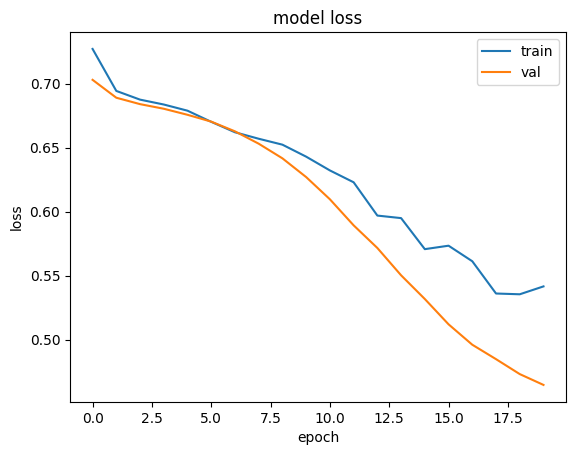

In [247]:
# Строим график потерь модели на обучающей выборке
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show

<h3>Выводы:</h3> 
<ul> 
<li>График потерь модели показывает, что потери на обучающей выборке устойчиво снижаются с увеличением количества эпох, но под конец чуть-чуть увеличивается.</li> 
<li>Потери на валидационной выборке также снижаются, но более плавно и стабильно, что указывает на хорошую обобщающую способность модели.</li> 

<li>Для улучшения производительности модели можно попробовать немного уменьшить количество эпох.</li> </ul>

Dropout увеличин на 0.1, количество эпох уменьшено с 20 до 17

In [261]:
# Создаем модель
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))    
model.add(Dropout(0.6))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Компилируем модель
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучаем модель
history = model.fit(X_train, y_train, epochs=17, batch_size=32, validation_split=0.2)

# Оцениваем модель на тестовой выборке
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.2f}')


Epoch 1/17
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5167 - loss: 0.7183 - val_accuracy: 0.6224 - val_loss: 0.6619
Epoch 2/17
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6324 - loss: 0.6796 - val_accuracy: 0.6713 - val_loss: 0.6448
Epoch 3/17
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6392 - loss: 0.6608 - val_accuracy: 0.6783 - val_loss: 0.6298
Epoch 4/17
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5984 - loss: 0.6751 - val_accuracy: 0.6923 - val_loss: 0.6187
Epoch 5/17
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6496 - loss: 0.6400 - val_accuracy: 0.6993 - val_loss: 0.6069
Epoch 6/17
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6691 - loss: 0.6501 - val_accuracy: 0.6993 - val_loss: 0.5959
Epoch 7/17
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6531 - loss: 0.6389 - val_accuracy: 0.7063 - val_loss: 0.5884
Epoch 8/17
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6646 - loss: 0.6095 - val_accuracy: 0.7203 - val_loss

Accuracy незначительно ухудшилось по сравнению с лучшей моделью(на 0.2)

<function matplotlib.pyplot.show(close=None, block=None)>

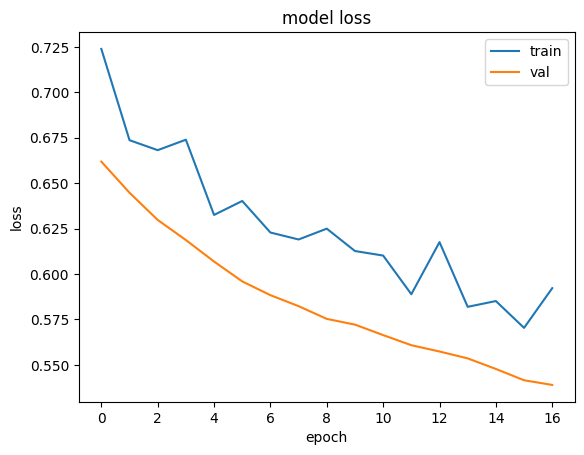

In [262]:
# Строим график потерь модели на обучающей выборке
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show

<h3>Выводы:</h3>
<ul>
<li>График потерь модели показывает, что потери на обучающей выборке устойчиво снижаются с увеличением количества эпох, но под конец наблюдаются колебания.</li>
<li>Потери на валидационной выборке также снижаются, но более плавно и стабильно, что указывает на хорошую обобщающую способность модели.</li>
</ul>

## Кросс-валидация лучшей модели

In [291]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score


# Разделение данных
X = data.drop(columns=['Survived'])
y = data['Survived']




# Инициализация KFold(c 3 фолдами, так как датасет маленький)
kfold = KFold(n_splits=3, shuffle=True, random_state=42)

# Список для хранения метрик
accuracies = []

# Цикл по фолдам
for train_index, val_index in kfold.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Нормализация данных
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)

    # Создание модели
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Компиляция модели
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Обучение модели
    model.fit(X_train, y_train, epochs=17, batch_size=32, verbose=0)

    # Оценка модели
    y_val_pred = (model.predict(X_val) > 0.5).astype("int32")
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracies.append(accuracy)

# Усреднение метрик
mean_accuracy = np.mean(accuracies)
print(f'Средняя точность: {mean_accuracy:.2f}')


c:\Users\ditriy\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


c:\Users\ditriy\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


c:\Users\ditriy\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Средняя точность: 0.74


<h3>Результаты кросс-валидации:</h3>
<p>Средняя точность модели при кросс-валидации составила 0.74. Это значение ниже, чем точность исходной модели, которая составляла 0.83. Это может указывать на то, что модель переобучается на тренировочных данных и недостаточно хорошо обобщается на новых данных.</p>

<p>Малый размер датасета может приводить к тому, что модель не получает достаточно информации для обобщения на новых данных. 



## Матрица Ошибок

c:\Users\ditriy\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


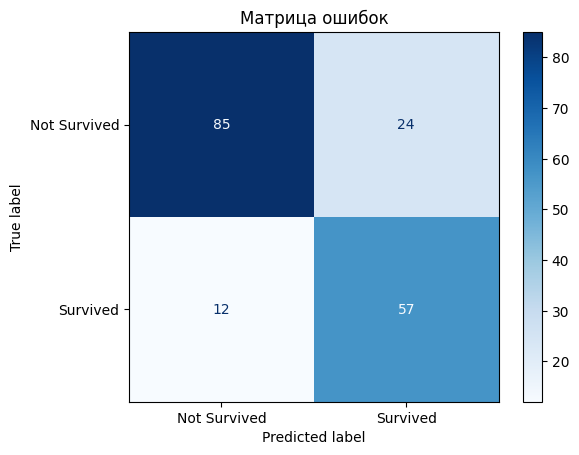

In [293]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Создание лучшей модели
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели
model.fit(X_train, y_train, epochs=17, batch_size=32, verbose=0)

# Предсказания на тестовом наборе
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Построение матрицы ошибок
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Survived', 'Survived'])

# Визуализация матрицы ошибок
disp.plot(cmap=plt.cm.Blues)
plt.title('Матрица ошибок')
plt.show()


<h3>Выводы по матрице ошибок:</h3>
<p>Матрица ошибок показывает производительность модели на тестовом наборе данных. Рассмотрим основные метрики:</p>

<ul>
    <li><strong>True Positive (TP):</strong> 57 - Количество правильно предсказанных выживших пассажиров.</li>
    <li><strong>True Negative (TN):</strong> 85 - Количество правильно предсказанных не выживших пассажиров.</li>
    <li><strong>False Positive (FP):</strong> 24 - Количество ошибочно предсказанных выживших пассажиров, которые не выжили.</li>
    <li><strong>False Negative (FN):</strong> 12 - Количество ошибочно предсказанных не выжившиех пассажиров, которые выжили.</li>
</ul>

<p>Из матрицы ошибок можно сделать следующие выводы:</p>
<ul>
    <li>Модель хорошо справляется с предсказанием отрицательного класса (не выживших пассажиров) с 85 правильными предсказаниями из 109 возможных (TP + FN).</li>
    <li>Модель также показывает хорошие результаты в предсказании положительного класса (выживших пассажиров) с 57 правильными предсказаниями из 69 возможных (TP + FP).</li>
    <li>Ошибки модели включают 24 ложных положительных (FP) и 12 ложных отрицательных (FN) предсказаний.</li>
    <li>Высокое количество True Negative (TN) указывает на то, что модель хорошо распознает пассажиров, которые не выжили.</li>
</ul>


## Общий Вывод

Пол, возраст — самые влияющие на выживание факторы;

Наличие относительно плохих результатов можно обьяснить маленьким датасетом

<p>Средняя точность модели при кросс-валидации составила 0.74. Это значение ниже, чем точность исходной модели, которая составляла 0.83. Это может указывать на то, что модель переобучается на тренировочных данных и недостаточно хорошо обобщается на новых данных.</p>

<h3>Для улучшения модели можно</h3> 
<ul>
<li>
Оптимизировать гиперпараметры
</li>
<li>
Использовать методы регуляризации для предотвращения переобучения
</li>
<li>
Сделать более детальную предварительную обработку данных
</li>
<ul>
